In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr


import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #datapath
# path='/content/drive/MyDrive/Junnatul_Mawa_DS Assesment_CMED/test-dataset.xlsx'

In [ ]:
# data_df=pd.read_excel(path)
# import requests

# # URL of the dataset
#https://github.com/MawaJunnatul/Data-analysis/blob/main/test-dataset.xlsx
url = 'https://github.com/MawaJunnatul/Data-analysis/raw/main/test-dataset.xlsx'
data_df = pd.read_excel(url)
data_df


Unnamed: 0  household_id        total_income    union_name  user_id  \
0               1        241175         Lower class          KOLA   988794   
1               2        241176         Lower class          KOLA   988796   
2               3        241179         Lower class          KOLA   988802   
3               4        241180         Lower class          KOLA   988807   
4               5        241181         Lower class          KOLA   988809   
...           ...           ...                 ...           ...      ...   
29994       29995        347687         Lower class  DURGAPUR-225  1378637   
29995       29996        347687         Lower class  DURGAPUR-225  1378639   
29996       29997        347774  Lower-middle class  DURGAPUR-225  1379055   
29997       29998        347198         Lower class  DURGAPUR-225  1376390   
29998       29999        347780         Lower class  DURGAPUR-225  1379079   

        profile_name father_name  mother_name             birthday  age  ...  \
0      মো: সাগরহোসেন         0.0          0.0  2001-11-05 18:00:00   19  ...   
1      মোছা:তামান্না         0.0          0.0  2000-06-18 18:00:00   20  ...   
2       শুকুরুচন্দ্র         0.0          0.0  1978-06-04 18:00:00   42  ...   
3         দিপালীরাণী         0.0          0.0  1956-02-02 18:00:00   64  ...   
4            বুলবুলি         0.0          0.0  1996-12-25 18:00:00   23  ...   
...              ...         ...          ...                  ...  ...  ...   
29994  র্স্বণাআক্তার   মৃত দুলাল       হাজেরা  1997-03-12 06:33:08   23  ...   
29995  ওয়াহিদাআক্তার           0            0  1955-03-12 06:33:08   65  ...   
29996    ছালমাআক্তার           0            0  1985-03-12 06:33:43   35  ...   
29997      মরিয়মবিবি   মৃত নুরুল  মৃত নুরব্নু  1984-04-07 18:00:00   36  ...   
29998     সখিনাখাতুন           0            0  1960-03-12 06:33:45   60  ...   

      RESULT_STAT_BMI  SUGAR  TAG_NAME  RESULT_STAT_SUGAR  PULSE_RATE  \
0                 NaN    NaN       NaN                NaN        96.0   
1                 NaN    NaN       NaN                NaN        89.0   
2                 NaN    NaN       NaN                NaN        69.0   
3                 NaN   8.72    Random             Normal        85.0   
4                 NaN    NaN       NaN                NaN       101.0   
...               ...    ...       ...                ...         ...   
29994             NaN    NaN       NaN                NaN       103.0   
29995             NaN    NaN       NaN                NaN        91.0   
29996             NaN    NaN       NaN                NaN        97.0   
29997             NaN  12.18    Random               High         NaN   
29998             NaN    NaN       NaN                NaN        74.0   

      RESULT_STAT_PR  SPO2  RESULT_STAT_SPO2  MUAC  RESULT_STAT_MUAC  
0             Normal  97.0            Normal   NaN               NaN  
1             Normal   NaN               NaN   NaN               NaN  
2             Normal   NaN               NaN   NaN               NaN  
3             Normal   NaN               NaN   NaN               NaN  
4               High   NaN               NaN   NaN               NaN  
...              ...   ...               ...   ...               ...  
29994           High   NaN               NaN   NaN               NaN  
29995         Normal   NaN               NaN   NaN               NaN  
29996         Normal   NaN               NaN   NaN               NaN  
29997            NaN   NaN               NaN   NaN               NaN  
29998         Normal   NaN               NaN   NaN               NaN  

[29999 rows x 34 columns]

In [ ]:
data_df.head(5)

Unnamed: 0  household_id total_income union_name  user_id   profile_name  \
0           1        241175  Lower class       KOLA   988794  মো: সাগরহোসেন   
1           2        241176  Lower class       KOLA   988796  মোছা:তামান্না   
2           3        241179  Lower class       KOLA   988802   শুকুরুচন্দ্র   
3           4        241180  Lower class       KOLA   988807     দিপালীরাণী   
4           5        241181  Lower class       KOLA   988809        বুলবুলি   

  father_name mother_name             birthday  age  ... RESULT_STAT_BMI  \
0         0.0         0.0  2001-11-05 18:00:00   19  ...             NaN   
1         0.0         0.0  2000-06-18 18:00:00   20  ...             NaN   
2         0.0         0.0  1978-06-04 18:00:00   42  ...             NaN   
3         0.0         0.0  1956-02-02 18:00:00   64  ...             NaN   
4         0.0         0.0  1996-12-25 18:00:00   23  ...             NaN   

   SUGAR  TAG_NAME  RESULT_STAT_SUGAR  PULSE_RATE RESULT_STAT_PR  SPO2  \
0    NaN       NaN                NaN        96.0         Normal  97.0   
1    NaN       NaN                NaN        89.0         Normal   NaN   
2    NaN       NaN                NaN        69.0         Normal   NaN   
3   8.72    Random             Normal        85.0         Normal   NaN   
4    NaN       NaN                NaN       101.0           High   NaN   

   RESULT_STAT_SPO2  MUAC  RESULT_STAT_MUAC  
0            Normal   NaN               NaN  
1               NaN   NaN               NaN  
2               NaN   NaN               NaN  
3               NaN   NaN               NaN  
4               NaN   NaN               NaN  

[5 rows x 34 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  29999 non-null  int64  
 1   household_id                29999 non-null  int64  
 2   total_income                29999 non-null  object 
 3   union_name                  29999 non-null  object 
 4   user_id                     29999 non-null  int64  
 5   profile_name                29999 non-null  object 
 6   father_name                 25561 non-null  object 
 7   mother_name                 25547 non-null  object 
 8   birthday                    29999 non-null  object 
 9   age                         29999 non-null  int64  
 10  gender                      29999 non-null  object 
 11  is_poor                     29999 non-null  int64  
 12  is_freedom_fighter          29999 non-null  int64  
 13  had_stroke                  299

In [ ]:
#total columns number
print(len(data_df.columns))

#total number of rows
print(len(data_df.index))

#print shape
print(data_df.shape)
#print all columns
print(data_df.columns.values)

34
29999
(29999, 34)
['Unnamed: 0' 'household_id' 'total_income' 'union_name' 'user_id'
 'profile_name' 'father_name' 'mother_name' 'birthday' 'age' 'gender'
 'is_poor' 'is_freedom_fighter' 'had_stroke' 'has_cardiovascular_disease'
 'disabilities_name' 'diabetic' 'profile_hypertensive' 'SYSTOLIC'
 'DIASTOLIC' 'RESULT_STAT_BP' 'HEIGHT' 'WEIGHT' 'BMI' 'RESULT_STAT_BMI'
 'SUGAR' 'TAG_NAME' 'RESULT_STAT_SUGAR' 'PULSE_RATE' 'RESULT_STAT_PR'
 'SPO2' 'RESULT_STAT_SPO2' 'MUAC' 'RESULT_STAT_MUAC']


In [ ]:
df=data_df.copy()
check_columns = data_df.columns.to_list()
#df.shape, df.columns, new_columns
check_columns

['Unnamed: 0',
 'household_id',
 'total_income',
 'union_name',
 'user_id',
 'profile_name',
 'father_name',
 'mother_name',
 'birthday',
 'age',
 'gender',
 'is_poor',
 'is_freedom_fighter',
 'had_stroke',
 'has_cardiovascular_disease',
 'disabilities_name',
 'diabetic',
 'profile_hypertensive',
 'SYSTOLIC',
 'DIASTOLIC',
 'RESULT_STAT_BP',
 'HEIGHT',
 'WEIGHT',
 'BMI',
 'RESULT_STAT_BMI',
 'SUGAR',
 'TAG_NAME',
 'RESULT_STAT_SUGAR',
 'PULSE_RATE',
 'RESULT_STAT_PR',
 'SPO2',
 'RESULT_STAT_SPO2',
 'MUAC',
 'RESULT_STAT_MUAC']

In [ ]:
new_columns = []
for i in data_df.columns:
  if i[0] == 'x':
    temp = '_' + i[2:].upper()
    new_columns.append(temp)
  else:
    temp = i.upper()
    new_columns.append(temp)


data_df.columns = new_columns
data_df

UNNAMED: 0  HOUSEHOLD_ID        TOTAL_INCOME    UNION_NAME  USER_ID  \
0               1        241175         Lower class          KOLA   988794   
1               2        241176         Lower class          KOLA   988796   
2               3        241179         Lower class          KOLA   988802   
3               4        241180         Lower class          KOLA   988807   
4               5        241181         Lower class          KOLA   988809   
...           ...           ...                 ...           ...      ...   
29994       29995        347687         Lower class  DURGAPUR-225  1378637   
29995       29996        347687         Lower class  DURGAPUR-225  1378639   
29996       29997        347774  Lower-middle class  DURGAPUR-225  1379055   
29997       29998        347198         Lower class  DURGAPUR-225  1376390   
29998       29999        347780         Lower class  DURGAPUR-225  1379079   

        PROFILE_NAME FATHER_NAME  MOTHER_NAME             BIRTHDAY  AGE  ...  \
0      মো: সাগরহোসেন         0.0          0.0  2001-11-05 18:00:00   19  ...   
1      মোছা:তামান্না         0.0          0.0  2000-06-18 18:00:00   20  ...   
2       শুকুরুচন্দ্র         0.0          0.0  1978-06-04 18:00:00   42  ...   
3         দিপালীরাণী         0.0          0.0  1956-02-02 18:00:00   64  ...   
4            বুলবুলি         0.0          0.0  1996-12-25 18:00:00   23  ...   
...              ...         ...          ...                  ...  ...  ...   
29994  র্স্বণাআক্তার   মৃত দুলাল       হাজেরা  1997-03-12 06:33:08   23  ...   
29995  ওয়াহিদাআক্তার           0            0  1955-03-12 06:33:08   65  ...   
29996    ছালমাআক্তার           0            0  1985-03-12 06:33:43   35  ...   
29997      মরিয়মবিবি   মৃত নুরুল  মৃত নুরব্নু  1984-04-07 18:00:00   36  ...   
29998     সখিনাখাতুন           0            0  1960-03-12 06:33:45   60  ...   

      RESULT_STAT_BMI  SUGAR  TAG_NAME  RESULT_STAT_SUGAR  PULSE_RATE  \
0                 NaN    NaN       NaN                NaN        96.0   
1                 NaN    NaN       NaN                NaN        89.0   
2                 NaN    NaN       NaN                NaN        69.0   
3                 NaN   8.72    Random             Normal        85.0   
4                 NaN    NaN       NaN                NaN       101.0   
...               ...    ...       ...                ...         ...   
29994             NaN    NaN       NaN                NaN       103.0   
29995             NaN    NaN       NaN                NaN        91.0   
29996             NaN    NaN       NaN                NaN        97.0   
29997             NaN  12.18    Random               High         NaN   
29998             NaN    NaN       NaN                NaN        74.0   

      RESULT_STAT_PR  SPO2  RESULT_STAT_SPO2  MUAC  RESULT_STAT_MUAC  
0             Normal  97.0            Normal   NaN               NaN  
1             Normal   NaN               NaN   NaN               NaN  
2             Normal   NaN               NaN   NaN               NaN  
3             Normal   NaN               NaN   NaN               NaN  
4               High   NaN               NaN   NaN               NaN  
...              ...   ...               ...   ...               ...  
29994           High   NaN               NaN   NaN               NaN  
29995         Normal   NaN               NaN   NaN               NaN  
29996         Normal   NaN               NaN   NaN               NaN  
29997            NaN   NaN               NaN   NaN               NaN  
29998         Normal   NaN               NaN   NaN               NaN  

[29999 rows x 34 columns]

# Graphs

DataFrame shape after dropping NaN values: (27404, 34)


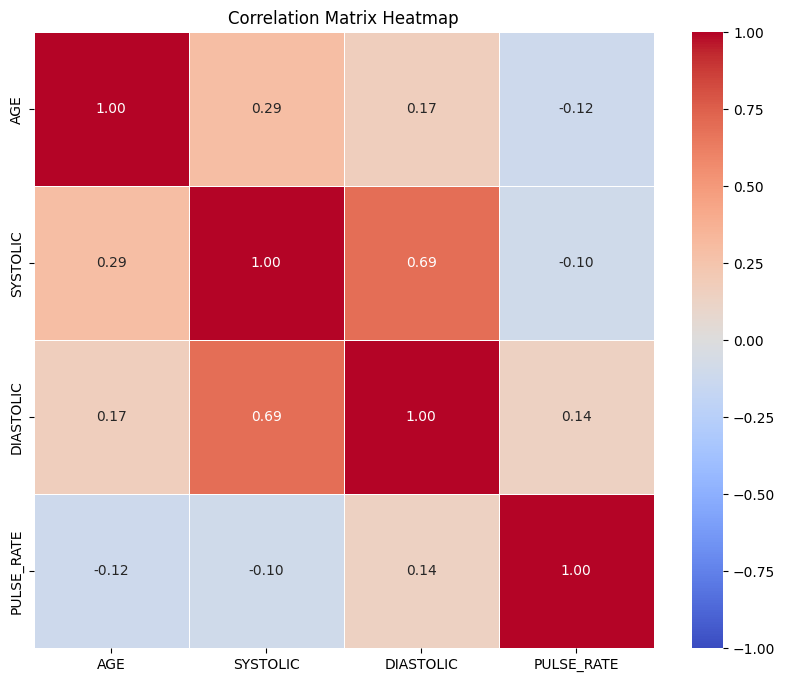

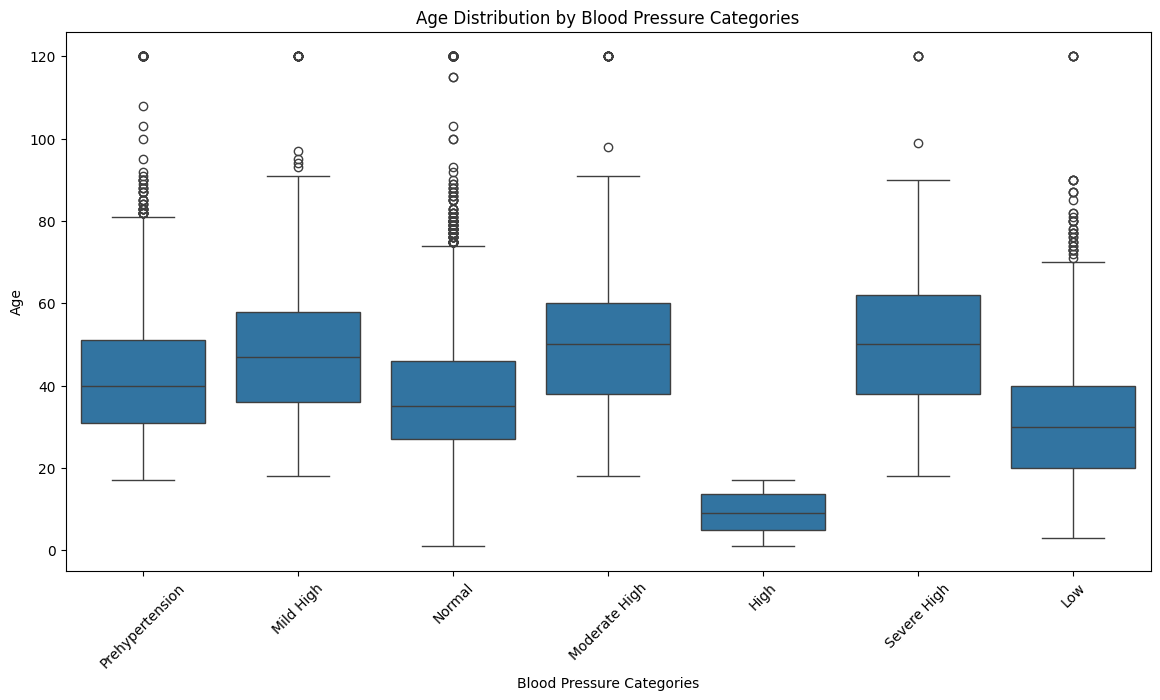

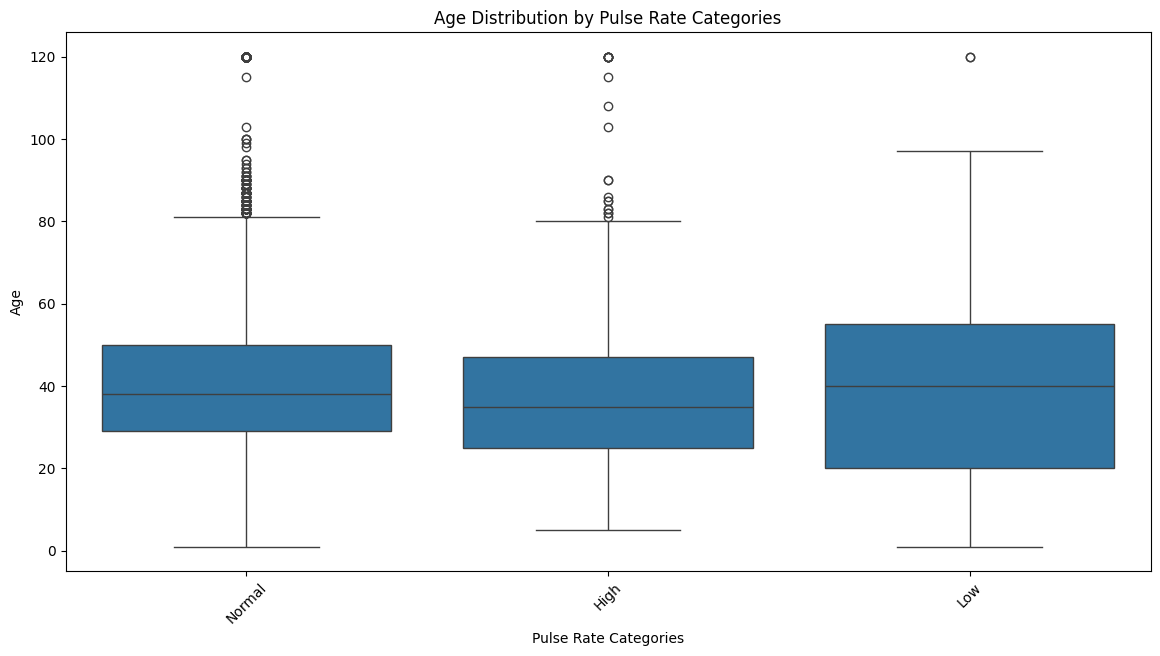

In [ ]:
# Drop rows with NaN values in 'RESULT_STAT_BP', 'RESULT_STAT_PR', and 'AGE'
filter_df = data_df.dropna(subset=['RESULT_STAT_BP', 'RESULT_STAT_PR', 'AGE'])

# Print the shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
numeric_data = filter_df[['AGE', 'SYSTOLIC', 'DIASTOLIC', 'PULSE_RATE']]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

print()
# Plot AGE vs. Blood Pressure Categories
plt.figure(figsize=(14, 7))
sns.boxplot(data=filter_df, x='RESULT_STAT_BP', y='AGE')
plt.title('Age Distribution by Blood Pressure Categories')
plt.xlabel('Blood Pressure Categories')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()
print()

# Plot AGE vs. Pulse Rate Categories
plt.figure(figsize=(14, 7))
sns.boxplot(data=filter_df, x='RESULT_STAT_PR', y='AGE')
plt.title('Age Distribution by Pulse Rate Categories')
plt.xlabel('Pulse Rate Categories')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Based on the dataset i have decided to do hypothesis on the following :

Association between Blood Pressure and Gender

Association between Blood Pressure and Age

Association between Gender and Diabetic

Association between Age and Diabetic

Association between Pluse Rates and Gender

Association between Pluse Rates and Age

I will be using Chi Square Test for these hypothesis

Association between systolic over the blood pressure

Association between diastolic over the blood pressure

Association between pluse rates over the age

I will be using ANOVA Test for these hypothesis

Association between systolic and diastolic

I will be using Pearson correlation coefficient for these hypothesis

Chi-square test formula


Chi_Sq_formula.avif
where, c = Degrees of freedom O = Observed Value E = Expected Value Null Hypothesis (H0) - The Null Hypothesis is the assumption that the event will not occur. A null hypothesis has no bearing on the study's outcome unless it is rejected.

Alternate Hypothesis(H1 or Ha) - The Alternate Hypothesis is the logical opposite of the null hypothesis. The acceptance of the alternative hypothesis follows the rejection of the null hypothesis. H1 is the symbol for it.

#Association between Blood Pressure and Gender

In [ ]:
# Extract GENDERS and categories (RESULT_STAT_BP)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['GENDER', 'RESULT_STAT_BP'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
GENDERS = filter_df['GENDER']
categories = filter_df['RESULT_STAT_BP']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and GENDER combination
GENDER_category_counts = {}
for GENDER in set(GENDERS):
  GENDER_category_counts[GENDER] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of GENDER and category
for GENDER, category in zip(GENDERS, categories):
  GENDER_category_counts[GENDER][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(GENDER_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(GENDERS)

print(df)

DataFrame shape after dropping NaN values: (27600, 34)
        Severe High  Prehypertension  High  Normal  Moderate High   Low  \
Male            190             1649   176    2037            468   379   
Female          440             5410   369    9453           1130  2325   

        Mild High  
Male          958  
Female       2616  


In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between gender and blood pressure categories.")
print("Alternative hypothesis: There is an association between gender and blood pressure categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between gender and blood pressure categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between gender and blood pressure categories.")

Chi-square statistic: 386.02635623160285
p-value: 2.818939865027489e-80
Degrees of freedom: 6
Expected frequencies:
         Severe High  Prehypertension        High       Normal  Moderate High  \
Male     133.692391      1497.991413  115.654529  2438.294565     339.111812   
Female   496.307609      5561.008587  429.345471  9051.705435    1258.888188   

                Low    Mild High  
Male     573.816232   758.439058  
Female  2130.183768  2815.560942  

Null hypothesis: There is no association between gender and blood pressure categories.
Alternative hypothesis: There is an association between gender and blood pressure categories.

Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis.
There is significant evidence of an association between gender and blood pressure categories.


#Association between Blood Pressure and Age

In [ ]:
# Extract AGES and categories (RESULT_STAT_BP)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['AGE', 'RESULT_STAT_BP'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
AGES = filter_df['AGE']
categories = filter_df['RESULT_STAT_BP']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and AGE combination
AGE_category_counts = {}
for AGE in set(AGES):
  AGE_category_counts[AGE] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of AGE and category
for AGE, category in zip(AGES, categories):
  AGE_category_counts[AGE][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(AGE_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(AGES)

print(df)

DataFrame shape after dropping NaN values: (27600, 34)
     Severe High  Prehypertension  High  Normal  Moderate High  Low  Mild High
1              0                0    32       4              0    0          0
2              0                0    27       4              0    0          0
3              0                0    27       6              0    2          0
4              0                0    30       8              0    1          0
5              0                0    51      12              0    1          0
..           ...              ...   ...     ...            ...  ...        ...
100            0                1     0       2              0    0          0
103            0                1     0       1              0    0          0
108            0                1     0       0              0    0          0
115            0                0     0       2              0    0          0
120            4               35     0      60             13    5         

In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between age and blood pressure categories.")
print("Alternative hypothesis: There is an association between age and blood pressure categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between age and blood pressure categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between age and blood pressure categories.")

Chi-square statistic: 19003.943708591734
p-value: 0.0
Degrees of freedom: 612
Expected frequencies:
      Severe High  Prehypertension      High     Normal  Moderate High  \
1       0.821739         9.207391  0.710870  14.986957       2.084348   
2       0.707609         7.928587  0.612138  12.905435       1.794855   
3       0.798913         8.951630  0.691123  14.570652       2.026449   
4       0.890217         9.974674  0.770109  16.235870       2.258043   
5       1.460870        16.368696  1.263768  26.643478       3.705507   
..           ...              ...       ...        ...            ...   
100     0.068478         0.767283  0.059239   1.248913       0.173696   
103     0.045652         0.511522  0.039493   0.832609       0.115797   
108     0.022826         0.255761  0.019746   0.416304       0.057899   
115     0.045652         0.511522  0.039493   0.832609       0.115797   
120     3.013043        33.760435  2.606522  54.952174       7.642609   

           Low  Mild H

#Association between Diabetic and Gender

In [ ]:
# Extract GENDERS and categories (DIABETIC)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['GENDER', 'DIABETIC'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
GENDERS = filter_df['GENDER']
categories = filter_df['DIABETIC']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and GENDER combination
GENDER_category_counts = {}
for GENDER in set(GENDERS):
  GENDER_category_counts[GENDER] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of GENDER and category
for GENDER, category in zip(GENDERS, categories):
  GENDER_category_counts[GENDER][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(GENDER_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(GENDERS)

print(df)

DataFrame shape after dropping NaN values: (29999, 34)
        False  True 
Male     6639    124
Female  22759    477


In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between gender and diabetic categories.")
print("Alternative hypothesis: There is an association between gender and diabetic categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between gender and diabetic categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between gender and diabetic categories.")

Chi-square statistic: 1.174407261368207
p-value: 0.2784975140725756
Degrees of freedom: 1
Expected frequencies:
               False      True 
Male     6627.51005  135.48995
Female  22770.48995  465.51005

Null hypothesis: There is no association between gender and diabetic categories.
Alternative hypothesis: There is an association between gender and diabetic categories.

Since p-value (0.2785) >= alpha (0.05), we do not reject the null hypothesis.
There is insufficient evidence to conclude an association between gender and diabetic categories.


#Association between Diabetic and Age

In [ ]:
# Extract AGES and categories (DIABETIC)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['AGE', 'DIABETIC'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
AGES = filter_df['AGE']
categories = filter_df['DIABETIC']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and AGE combination
AGE_category_counts = {}
for AGE in set(AGES):
  AGE_category_counts[AGE] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of AGE and category
for AGE, category in zip(AGES, categories):
  AGE_category_counts[AGE][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(AGE_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(AGES)

print(df)

DataFrame shape after dropping NaN values: (29999, 34)
     False  True 
0       25      0
1      105      0
2      115      0
3      125      0
4      108      0
..     ...    ...
103      2      0
107      1      0
108      1      0
115      2      0
120    134      0

[105 rows x 2 columns]


In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between age and diabetic categories.")
print("Alternative hypothesis: There is an association between age and diabetic categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between age and diabetic categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between age and diabetic categories.")

Chi-square statistic: 593.2816645850285
p-value: 1.3970850960881566e-69
Degrees of freedom: 104
Expected frequencies:
           False     True 
0     24.499150  0.500850
1    102.896430  2.103570
2    112.696090  2.303910
3    122.495750  2.504250
4    105.836328  2.163672
..          ...       ...
103    1.959932  0.040068
107    0.979966  0.020034
108    0.979966  0.020034
115    1.959932  0.040068
120  131.315444  2.684556

[105 rows x 2 columns]

Null hypothesis: There is no association between age and diabetic categories.
Alternative hypothesis: There is an association between age and diabetic categories.

Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis.
There is significant evidence of an association between age and diabetic categories.


#Association between Pluse Rates and Gender

In [ ]:
# Extract GENDERS and categories (RESULT_STAT_PR)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['GENDER', 'RESULT_STAT_PR'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
GENDERS = filter_df['GENDER']
categories = filter_df['RESULT_STAT_PR']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and GENDER combination
GENDER_category_counts = {}
for GENDER in set(GENDERS):
  GENDER_category_counts[GENDER] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of GENDER and category
for GENDER, category in zip(GENDERS, categories):
  GENDER_category_counts[GENDER][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(GENDER_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(GENDERS)

print(df)

DataFrame shape after dropping NaN values: (27455, 34)
        Low  High  Normal
Male    336   355    5113
Female  478  1851   19322


In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between gender and Pluse rates categories.")
print("Alternative hypothesis: There is an association between gender and Pluse rates categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between gender and Pluse rates categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between gender and Pluse rates categories.")

Chi-square statistic: 232.39769961181872
p-value: 3.431474104009894e-51
Degrees of freedom: 2
Expected frequencies:
                Low         High       Normal
Male    172.079985   466.349445   5165.57057
Female  641.920015  1739.650555  19269.42943

Null hypothesis: There is no association between gender and Pluse rates categories.
Alternative hypothesis: There is an association between gender and Pluse rates categories.

Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis.
There is significant evidence of an association between gender and Pluse rates categories.


#Association between Pluse Rates and Age

In [ ]:
# Extract AGES and categories (RESULT_STAT_PR)
filter_df = data_df.copy()
filter_df = filter_df.dropna(subset=['AGE', 'RESULT_STAT_PR'])

# Print shape after dropping NaN values
print("DataFrame shape after dropping NaN values:", filter_df.shape)
GENDERS = filter_df['AGE']
categories = filter_df['RESULT_STAT_PR']

# Create a set of all unique categories (handles potential missing values)
unique_categories = set(categories)

# Create a dictionary to store counts for each category and AGE combination
AGE_category_counts = {}
for AGE in set(AGES):
  AGE_category_counts[AGE] = {cat: 0 for cat in unique_categories}

# Count occurrences for each combination of AGE and category
for AGE, category in zip(AGES, categories):
  AGE_category_counts[AGE][category] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(AGE_category_counts).transpose().fillna(0)  # Fill missing categories with 0

# Set column and row names
df.columns = unique_categories
df.index = set(AGES)

print(df)

DataFrame shape after dropping NaN values: (27455, 34)
     Low  High  Normal
0      2     3      20
1      3     5      86
2      4    11      93
3      7     6     101
4      6     4      86
..   ...   ...     ...
103    0     0       1
107    0     0       1
108    0     0       1
115    0     0       2
120    0     3       2

[105 rows x 3 columns]


In [ ]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))
print()

# Interpret the results
alpha = 0.05  # significance level
print("Null hypothesis: There is no association between age and Pluse rates categories.")
print("Alternative hypothesis: There is an association between age and Pluse rates categories.")
print()

if p < alpha:
    print(f"Since p-value ({p:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is significant evidence of an association between age and Pluse rates categories.")
else:
    print(f"Since p-value ({p:.4f}) >= alpha ({alpha}), we do not reject the null hypothesis.")
    print("There is insufficient evidence to conclude an association between age and Pluse rates categories.")

Chi-square statistic: 219.81855488620786
p-value: 0.27379708761165755
Degrees of freedom: 208
Expected frequencies:
           Low      High      Normal
0    0.741213  2.008742   22.250046
1    2.786960  7.552868   83.660171
2    3.202040  8.677764   96.120197
3    3.379931  9.159862  101.460208
4    2.846258  7.713568   85.440175
..        ...       ...         ...
103  0.029649  0.080350    0.890002
107  0.029649  0.080350    0.890002
108  0.029649  0.080350    0.890002
115  0.059297  0.160699    1.780004
120  0.148243  0.401748    4.450009

[105 rows x 3 columns]

Null hypothesis: There is no association between age and Pluse rates categories.
Alternative hypothesis: There is an association between age and Pluse rates categories.

Since p-value (0.2738) >= alpha (0.05), we do not reject the null hypothesis.
There is insufficient evidence to conclude an association between age and Pluse rates categories.


#Association  SYSTOLIC OVER the blood pressure

In [ ]:
# ASSOCIATION OF SYSTOLIC OVER THE blood pressure

df = pd.DataFrame(data_df)
df = df.dropna(subset=['SYSTOLIC', 'RESULT_STAT_BP'])

# Perform ANOVA test for SYSTOLIC across different categories of RESULT_STAT_BP
result_systolic = {}

for category in df['RESULT_STAT_BP'].unique():
    result_systolic[category] = df[df['RESULT_STAT_BP'] == category]['SYSTOLIC']

anova_systolic = f_oneway(*result_systolic.values())

# Print ANOVA results for SYSTOLIC
print("ANOVA results for SYSTOLIC:")
print("F-statistic:", anova_systolic.statistic)
print("P-value:", anova_systolic.pvalue)

# Interpretation
alpha = 0.05  # Significance level

if anova_systolic.pvalue < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is sufficient evidence to reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in SYSTOLIC measurements among different categories of RESULT_STAT_BP.")
else:
    print("The p-value is greater than the significance level of", alpha)
    print("There is not enough evidence to reject the null hypothesis.")
    print("This suggests that there may not be a statistically significant difference in SYSTOLIC measurements among different categories of RESULT_STAT_BP.")

ANOVA results for SYSTOLIC:
F-statistic: 16161.19248206945
P-value: 0.0
The p-value is less than the significance level of 0.05
There is sufficient evidence to reject the null hypothesis.
This suggests that there is a statistically significant difference in SYSTOLIC measurements among different categories of RESULT_STAT_BP.


# ASSOCIATION OF PULSE_RATE OVER THE AGE(ANOVA)

In [ ]:
# ASSOCIATION OF PULSE_RATE OVER THE AGE

df = pd.DataFrame(data_df)
df = df.dropna(subset=['PULSE_RATE', 'AGE'])

# Perform ANOVA test for PULSE_RATE across different categories of AGE
result_PULSE_RATE = {}

for category in df['AGE'].unique():
    result_PULSE_RATE[category] = df[df['AGE'] == category]['PULSE_RATE']
anova_PULSE_RATE = f_oneway(*result_PULSE_RATE.values())

# Print ANOVA results for PULSE_RATE
print("ANOVA results for PULSE_RATE:")
print("F-statistic:", anova_PULSE_RATE.statistic)
print("P-value:", anova_PULSE_RATE.pvalue)
print()

# Interpretation
alpha = 0.05  # Significance level

if anova_PULSE_RATE.pvalue < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is sufficient evidence to reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in PULSE_RATE measurements among different categories of AGE.")
else:
    print("The p-value is greater than the significance level of", alpha)
    print("There is not enough evidence to reject the null hypothesis.")
    print("This suggests that there may not be a statistically significant difference in PULSE_RATE measurements among different categories of AGE.")

ANOVA results for PULSE_RATE:
F-statistic: 5.566435361779013
P-value: 6.659717656117343e-65

The p-value is less than the significance level of 0.05
There is sufficient evidence to reject the null hypothesis.
This suggests that there is a statistically significant difference in PULSE_RATE measurements among different categories of AGE.


#Association  DIASTOLIC OVER the blood pressure(ANOVA TEST)

In [ ]:
# ASSOCIATION OF DIASTOLIC OVER THE blood pressure

df = pd.DataFrame(data_df)
df = df.dropna(subset=['DIASTOLIC', 'RESULT_STAT_BP'])

# Perform ANOVA test for DIASTOLIC across different categories of RESULT_STAT_BP
result_diastolic = {}

for category in df['RESULT_STAT_BP'].unique():
    result_diastolic[category] = df[df['RESULT_STAT_BP'] == category]['DIASTOLIC']
anova_diastolic = f_oneway(*result_diastolic.values())

# Print ANOVA results for DIASTOLIC
print("ANOVA results for DIASTOLIC:")
print("F-statistic:", anova_diastolic.statistic)
print("P-value:", anova_diastolic.pvalue)
print()

# Interpretation
alpha = 0.05  # Significance level

if anova_diastolic.pvalue < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is sufficient evidence to reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in DIASTOLIC measurements among different categories of RESULT_STAT_BP.")
else:
    print("The p-value is greater than the significance level of", alpha)
    print("There is not enough evidence to reject the null hypothesis.")
    print("This suggests that there may not be a statistically significant difference in DIASTOLIC measurements among different categories of RESULT_STAT_BP.")

ANOVA results for DIASTOLIC:
F-statistic: 8045.5408982084655
P-value: 0.0

The p-value is less than the significance level of 0.05
There is sufficient evidence to reject the null hypothesis.
This suggests that there is a statistically significant difference in DIASTOLIC measurements among different categories of RESULT_STAT_BP.


#Association  BETWEEN SYSTOLIC AND DIASTOLIC


In [ ]:
#ASSOCIATION BETWEEN SYSTOLIC AND DIASTOLIC
df = pd.DataFrame(data_df)
df = df.dropna(subset=['SYSTOLIC', 'DIASTOLIC'])

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df['SYSTOLIC'], df['DIASTOLIC'])

# Print correlation coefficient and p-value
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print()

# Set significance level
alpha = 0.05

# Interpretation
if p_value < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is sufficient evidence to reject the null hypothesis.")
    print("This suggests that there is a statistically significant correlation between SYSTOLIC and DIASTOLIC measurements.")
    if corr > 0:
        print("The correlation coefficient indicates a positive linear relationship.")
    elif corr < 0:
        print("The correlation coefficient indicates a negative linear relationship.")
    else:
        print("The correlation coefficient is zero, indicating no linear relationship.")
else:
    print("The p-value is greater than the significance level of", alpha)
    print("There is not enough evidence to reject the null hypothesis.")
    print("This suggests that there may not be a statistically significant correlation between SYSTOLIC and DIASTOLIC measurements.")


Pearson correlation coefficient: 0.6941
P-value: 0.0000

The p-value is less than the significance level of 0.05
There is sufficient evidence to reject the null hypothesis.
This suggests that there is a statistically significant correlation between SYSTOLIC and DIASTOLIC measurements.
The correlation coefficient indicates a positive linear relationship.
